In [6]:

import pandas as pd
import numpy as np
import altair as alt
from tqdm import tqdm
from general_consts import *
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [7]:
def get_df(path, table_name):
    df = pd.read_csv(fr"{path}/{table_name}.csv")
    df[CPUColumns.TIME] = pd.to_datetime(df[CPUColumns.TIME], unit='s')
    return df

def load_tables(path):
    cpu_df = get_df(path, TableNames.CPU)
    memory_df = get_df(path, TableNames.MEMORY)
    all_processes_df = get_df(path, TableNames.ALL_PROCESSES)
    disk_df = get_df(path, TableNames.DISK)
    splunk_logs_df = pd.read_csv(fr"{path}/output.csv")
    return cpu_df, memory_df, all_processes_df, disk_df, splunk_logs_df
    
def draw_plot(df, y, path, plot_name):
    alt.renderers.enable('altair_saver', fmts=['png'])
    chart = alt.Chart(df).mark_line(interpolate='linear').encode(
        alt.Y(f"{y}:Q"),
        alt.X(f"{CPUColumns.TIME}:T"),
    ).properties(
        width=2100,
        height=300
    )
    # Create PNG image data and then write to a file
    with alt.data_transformers.enable('default'):
        chart.save(f"{path}/graphs/{plot_name}.png", engine="altair_saver")

In [9]:
for measurment_no in range(1, 7):
    path = fr"/home/green-sec/Repositories/GreenSecurity-FirstExperiment/Dell Inc. Linux 5.15.0-67-generic/Splunk Enterprise SIEM/Power Saver Plan/One Scan/Measurement {measurment_no}"
    cpu_df, memory_df, all_processes_df, disk_df, splunk_logs_df = load_tables(path)
    draw_plot(cpu_df, CPUColumns.USED_PERCENT, path, 'cpu')
    draw_plot(disk_df, DiskIOColumns.READ_COUNT, path, 'disk_read_count')
    draw_plot(disk_df, DiskIOColumns.WRITE_COUNT, path, 'disk_write_count')
    draw_plot(disk_df, DiskIOColumns.READ_BYTES, path, 'disk_read_bytes')
    draw_plot(disk_df, DiskIOColumns.WRITE_BYTES, path, 'disk_write_bytes')

<AxesSubplot:xlabel='_time'>

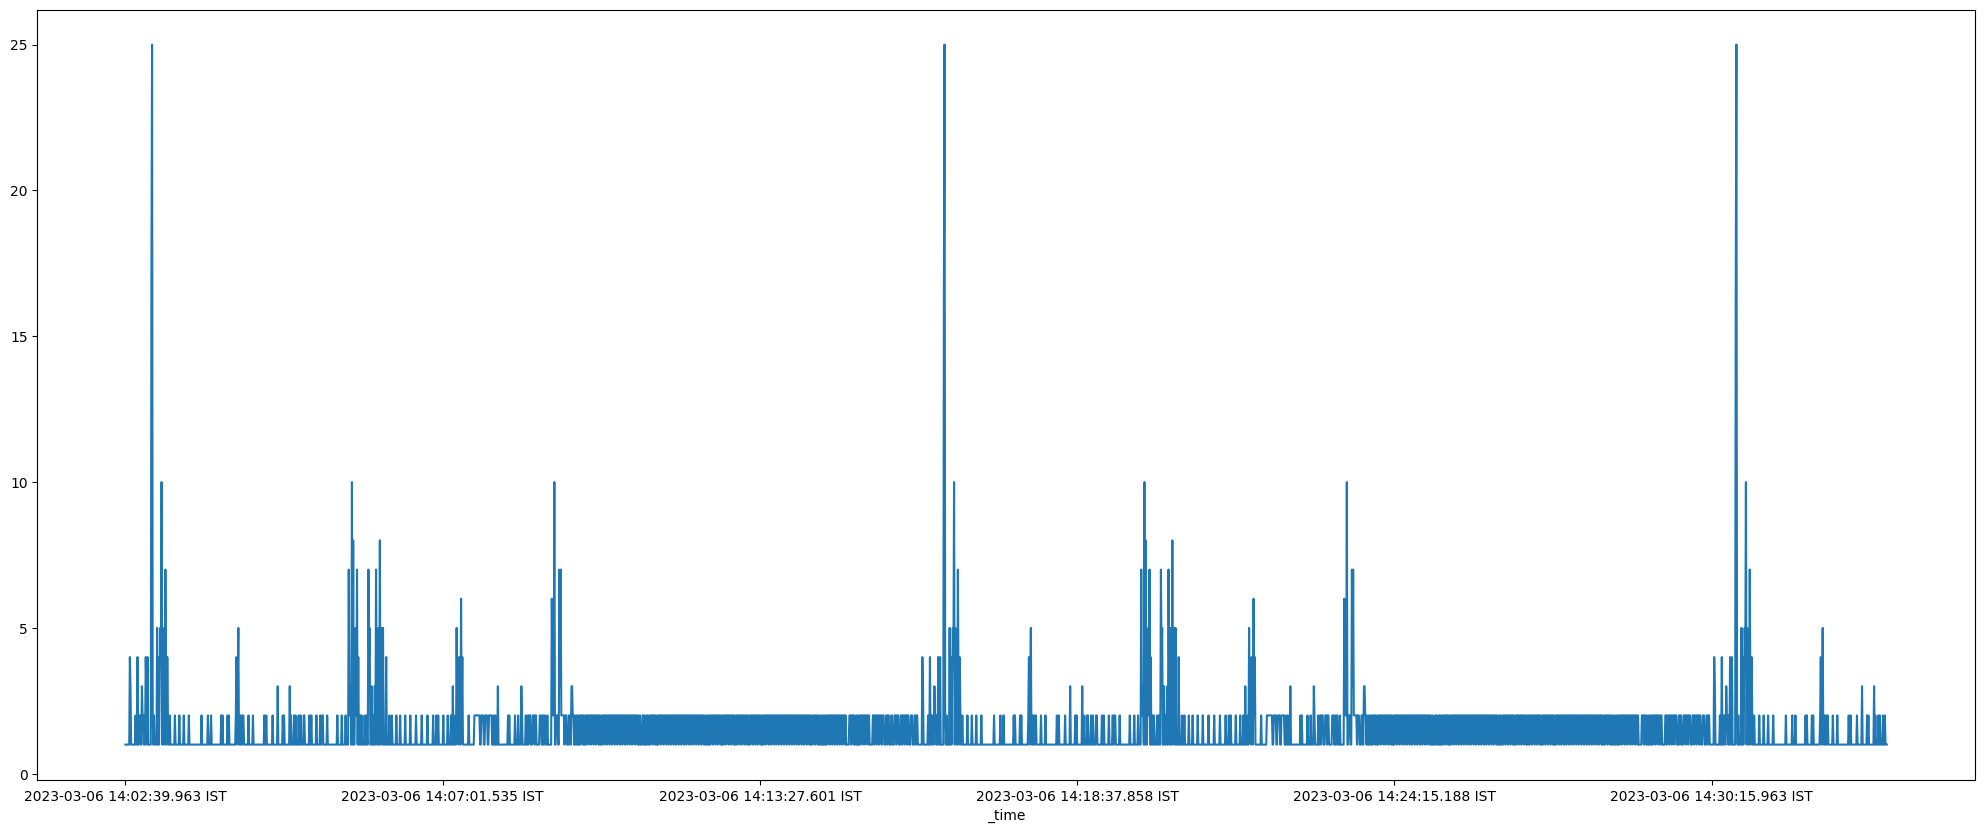

In [15]:
splunk_logs_df.groupby('_time')['source'].count().plot(figsize=(25,10))